# Data Science Capstone Project
# Predicting the severity of an Accident

In [1]:
# import basic required packages to start with
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

# Setting some options for pandas and matplotlib
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 5000)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
# Read CSV file data from given link. It will return pandas data frame containing data from Data-Collisions.csv
csv_file_url = r'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(csv_file_url)
print ('Completed CSV file data read into a pandas dataframe!')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Completed CSV file data read into a pandas dataframe!


In [3]:
# List forst 10 rows from dataframe
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK M

In [4]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [5]:
# List column names in dataframe
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

## Data Visualization and Analysis

In [6]:
# Cross check if there is any missing data even after feature categorization
# Function to get dictionary of counts for missig data and plot histogram from it.
def check_and_visualize_missing_data(data_frame):
    missing_data = data_frame.isnull()
    count_dict = {}
    for column in missing_data.columns.values.tolist():
        counts = missing_data[column].value_counts()
        for item in counts.iteritems():
            if True in item:
                count_dict[column] = item[1] ## count of Nan

    plt.bar(count_dict.keys(), count_dict.values(), color='g')
    plt.xticks(rotation='vertical')
    plt.show()

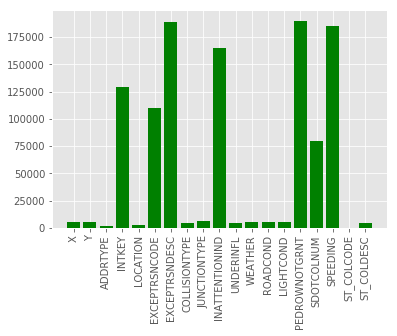

In [7]:
# Plot histogram to see, what columns can be dropped as they have more NaN values
check_and_visualize_missing_data(df)

### In first round of cleaning, we can see from above bar chart, that columns
### INTKEY, INCKEY, EXCEPTRSNCODE,EXCEPTRSNDESC, INATTENTIONIND, PEDROWNOTGRNT, SDOTCOLNUM, SPEEDING
### having maxinum NaN values, so we can drop these columns, as these will not be helping in a good model generation
### 'SEVERITYCODE', 'SEVERITYCODE.1', redundant data, so it can be deleted
### 'SEVERITYDESC' is description about severity, which is not required in model.
### 'LOCATION' has hundreads of different string values, which will not be helful to derive some conclusion.

### Apart from there are others columns which are significant, so remove them.

In [8]:
# Columns to drop from dataframe
cols = ['X', 'Y', 'INTKEY', 'INCKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'INATTENTIONIND',
        'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SEVERITYDESC', 'SEVERITYCODE.1', 'OBJECTID', 'COLDETKEY',
        'REPORTNO', 'STATUS',  'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC',
        'SEGLANEKEY', 'CROSSWALKKEY', 'PEDCOUNT', 'PEDCYLCOUNT', 'LOCATION']
df.drop(columns=cols, axis=1, inplace=True)

In [9]:
df.columns.values

array(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR'], dtype=object)

### Again analysis of missing values in remaining columns, to give idea about data

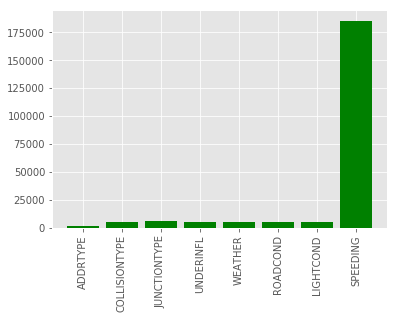

In [10]:
# Plot histogram to see, what columns can be dropped as they have more NaN values
check_and_visualize_missing_data(df)

### Although SPEEDING as big number of values missing, but it required feature and it boolean, so we are assuing if value not present SPEEDING is False

In [11]:
df.columns.values

array(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR'], dtype=object)

In [12]:
df.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
HITPARKEDCAR     object
dtype: object

## Data Understanding
### Group the data to understand the content of each attributes

#### ADDRTYPE (Address Type)

In [13]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

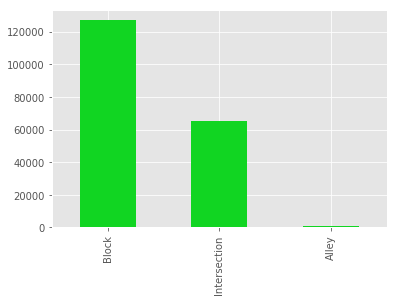

In [14]:
df['ADDRTYPE'].value_counts().plot(kind='bar', color=['#11D522'])  

#### COLLISIONTYPE (Collision Type)

In [15]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

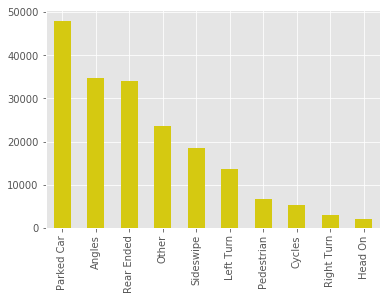

In [16]:
df['COLLISIONTYPE'].value_counts().plot(kind='bar', color=['#D5C911'])

#### VEHCOUNT (Vehical Count)

In [17]:
df['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

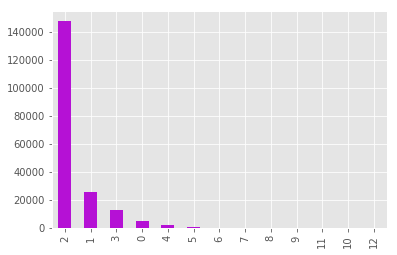

In [18]:
df['VEHCOUNT'].value_counts().plot(kind='bar', color=['#B511D5'])

#### JUNCTIONTYPE (Junction Type)

In [19]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

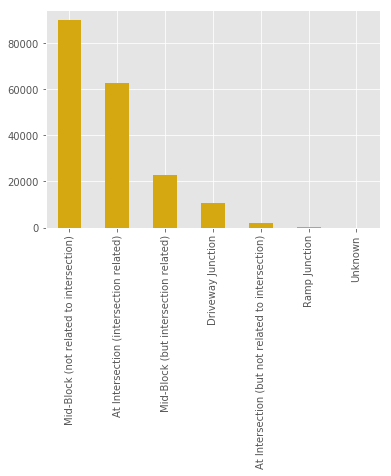

In [20]:
df['JUNCTIONTYPE'].value_counts().plot(kind='bar', color=['#D5A811'])

#### UNDERINFL (Under Influence of Alchohal or Drugs)

In [21]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

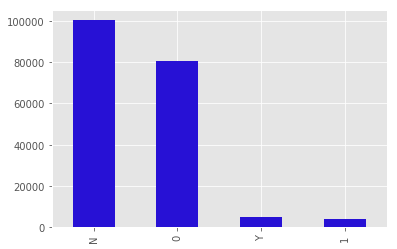

In [22]:
df['UNDERINFL'].value_counts().plot(kind='bar', color=['#2711D5'])

#### Here we can see inconsistency in values replaceing '1' with 'Y' and '0' with 'N' assuming Y is driver was under influence of alcohal or drug.

In [23]:
df['UNDERINFL'].replace('1', 'Y', inplace=True)
df['UNDERINFL'].replace('0', 'N', inplace=True)
df['UNDERINFL'].value_counts()

N    180668
Y      9121
Name: UNDERINFL, dtype: int64

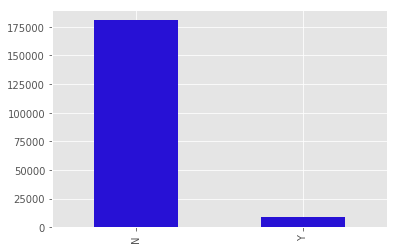

In [24]:
df['UNDERINFL'].value_counts().plot(kind='bar', color=['#2711D5'])

#### WEATHER (Weather Condition)

In [25]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

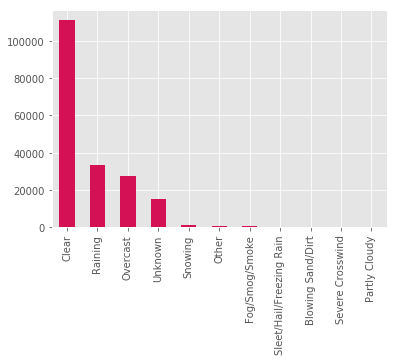

In [26]:
df['WEATHER'].value_counts().plot(kind='bar', color=['#D51155'])

#### ROADCOND (Road Condition)

In [27]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

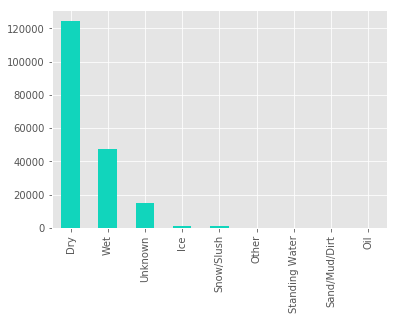

In [28]:
df['ROADCOND'].value_counts().plot(kind='bar', color=['#11D5BC'])

#### LIGHTCOND (Light Condition)

In [29]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

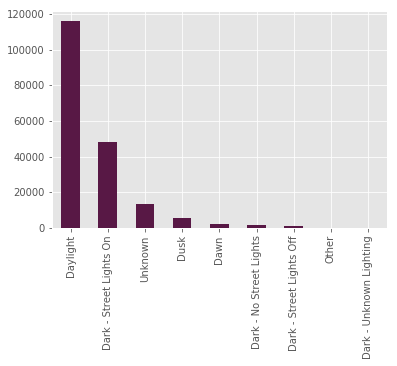

In [30]:
df['LIGHTCOND'].value_counts().plot(kind='bar', color=['#581845'])

#### SPEEDING (Car Speeding ?)

In [31]:
df['SPEEDING'].value_counts() ## Although count is less, but it is important feature, so absence assumed as Not Speeding.

Y    9333
Name: SPEEDING, dtype: int64

In [32]:
df['SPEEDING'].fillna('N', inplace=True)

In [33]:
df['SPEEDING'].value_counts() ## After replacement

N    185340
Y      9333
Name: SPEEDING, dtype: int64

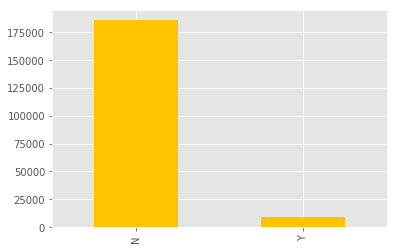

In [34]:
df['SPEEDING'].value_counts().plot(kind='bar', color=['#FFC300'])

#### HITPARKEDCAR (Hited Parked car ?)

In [35]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

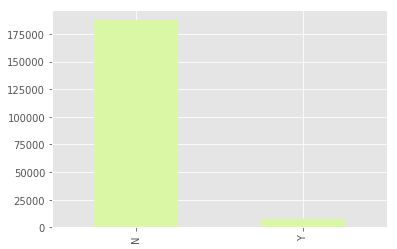

In [36]:
df['HITPARKEDCAR'].value_counts().plot(kind='bar', color=['#DAF7A6'])

#### SEVERITYCODE (Severity Code)

In [37]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

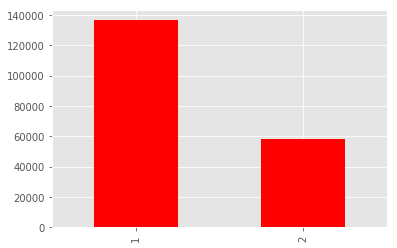

In [38]:
df['SEVERITYCODE'].value_counts().plot(kind='bar', color=['#FF0000'])

In [39]:
# Drop rows with one or more empty columns
df.dropna(axis=0, inplace=True)

## Graphical representation of feature values

In [40]:
df.columns.values

array(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR'], dtype=object)

In [41]:
features = ['ADDRTYPE', 'WEATHER', 'SPEEDING', 'LIGHTCOND', 'ROADCOND',
            'JUNCTIONTYPE', 'COLLISIONTYPE', 'UNDERINFL', 'PERSONCOUNT', 'VEHCOUNT', 'HITPARKEDCAR']

In [42]:
count_data_frame = df.groupby(['SEVERITYCODE']).aggregate(sum)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd23f566e10>,
      dtype=object)

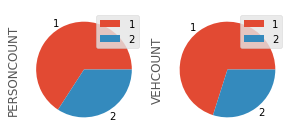

In [43]:
count_data_frame.plot(kind='pie', subplots=True, grid=True, layout=(1,6), figsize=(15, 10))

In [44]:
df.columns.values

array(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR'], dtype=object)

In [45]:
df.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
HITPARKEDCAR     object
dtype: object

#### Printing normalized values for various features

In [46]:
print(df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)
print(df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts(normalize=True))
print("=" * 80)

ADDRTYPE      SEVERITYCODE
Alley         1               0.876596
              2               0.123404
Block         1               0.754930
              2               0.245070
Intersection  1               0.568012
              2               0.431988
Name: SEVERITYCODE, dtype: float64
COLLISIONTYPE  SEVERITYCODE
Angles         1               0.606101
               2               0.393899
Cycles         2               0.877098
               1               0.122902
Head On        1               0.566132
               2               0.433868
Left Turn      1               0.604312
               2               0.395688
Other          1               0.738371
               2               0.261629
Parked Car     1               0.938960
               2               0.061040
Pedestrian     2               0.898511
               1               0.101489
Rear Ended     1               0.568205
               2               0.431795
Right Turn     1               0.793

### Graphical presenttation of normalized values for various features

#### Bar plot for ADDRTYPE (Address Type)

ADDRTYPE      SEVERITYCODE
Alley         1               0.876596
              2               0.123404
Block         1               0.754930
              2               0.245070
Intersection  1               0.568012
              2               0.431988
Name: SEVERITYCODE, dtype: float64


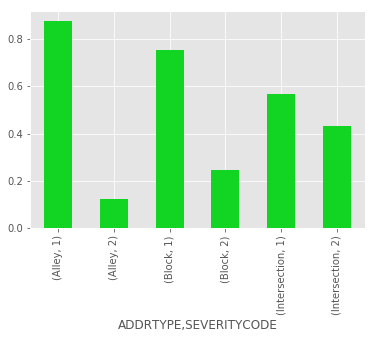

In [47]:
count_data_frame  = df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#11D522'])

#### Bar plot for COLLISIONTYPE (Collision Type)

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.606101
               2               0.393899
Cycles         2               0.877098
               1               0.122902
Head On        1               0.566132
               2               0.433868
Left Turn      1               0.604312
               2               0.395688
Other          1               0.738371
               2               0.261629
Parked Car     1               0.938960
               2               0.061040
Pedestrian     2               0.898511
               1               0.101489
Rear Ended     1               0.568205
               2               0.431795
Right Turn     1               0.793786
               2               0.206214
Sideswipe      1               0.865026
               2               0.134974
Name: SEVERITYCODE, dtype: float64


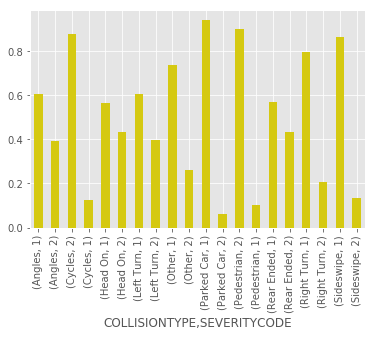

In [48]:
count_data_frame  = df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#D5C911'])

#### Bar plot for VEHCOUNT (Vehical Count)

VEHCOUNT  SEVERITYCODE
0         2               0.984615
          1               0.015385
1         2               0.555076
          1               0.444924
2         1               0.748156
          2               0.251844
3         1               0.577512
          2               0.422488
4         1               0.554632
          2               0.445368
5         1               0.503802
          2               0.496198
6         1               0.590278
          2               0.409722
7         1               0.511111
          2               0.488889
8         1               0.666667
          2               0.333333
9         2               0.666667
          1               0.333333
10        2               1.000000
11        1               0.500000
          2               0.500000
12        1               1.000000
Name: SEVERITYCODE, dtype: float64


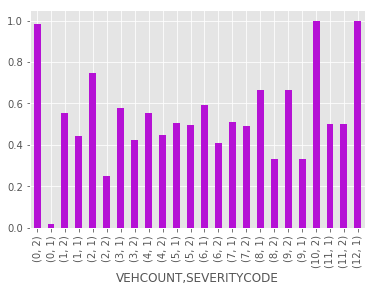

In [49]:
count_data_frame = df.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#B511D5'])

#### Bar plot for JUNCTIONTYPE (Junction Type)

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.700243
                                                   2               0.299757
At Intersection (intersection related)             1               0.563474
                                                   2               0.436526
Driveway Junction                                  1               0.696264
                                                   2               0.303736
Mid-Block (but intersection related)               1               0.678260
                                                   2               0.321740
Mid-Block (not related to intersection)            1               0.782274
                                                   2               0.217726
Ramp Junction                                      1               0.687500
                                                   2               0.312500
Unknown                 

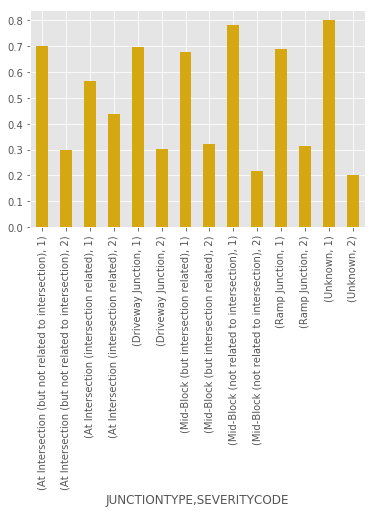

In [50]:
count_data_frame = df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#D5A811'])

#### Bar plot for UNDERINFL (Under influence of alchohal or drugs)

UNDERINFL  SEVERITYCODE
N          1               0.694666
           2               0.305334
Y          1               0.607869
           2               0.392131
Name: SEVERITYCODE, dtype: float64


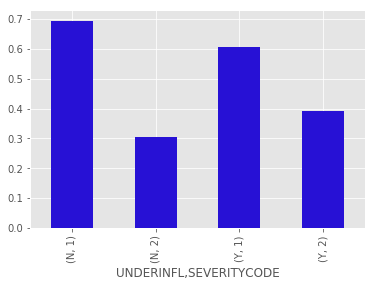

In [51]:
count_data_frame = df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#2711D5'])

#### Bar plot for WEATHER (Weather Condition)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.734694
                          2               0.265306
Clear                     1               0.673727
                          2               0.326273
Fog/Smog/Smoke            1               0.665468
                          2               0.334532
Other                     1               0.847185
                          2               0.152815
Overcast                  1               0.681014
                          2               0.318986
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.660468
                          2               0.339532
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.758929
                          2               0.241071
Snowing                   1               0

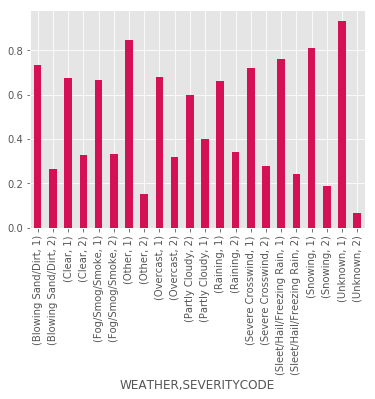

In [52]:
count_data_frame = df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#D51155'])

#### Bar plot for ROADCOND (Road Condition)

ROADCOND        SEVERITYCODE
Dry             1               0.674678
                2               0.325322
Ice             1               0.773152
                2               0.226848
Oil             1               0.600000
                2               0.400000
Other           1               0.658537
                2               0.341463
Sand/Mud/Dirt   1               0.671642
                2               0.328358
Snow/Slush      1               0.831288
                2               0.168712
Standing Water  1               0.731481
                2               0.268519
Unknown         1               0.938623
                2               0.061377
Wet             1               0.665382
                2               0.334618
Name: SEVERITYCODE, dtype: float64


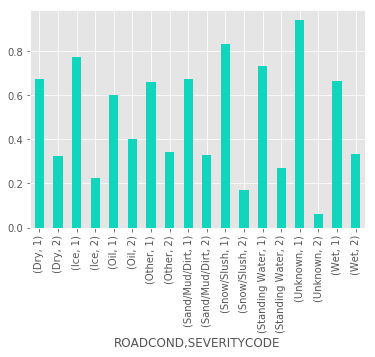

In [53]:
count_data_frame = df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#11D5BC'])

#### Bar plot for LIGHTCOND (Light Condition)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.775496
                          2               0.224504
Dark - Street Lights Off  1               0.729473
                          2               0.270527
Dark - Street Lights On   1               0.698172
                          2               0.301828
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.666123
                          2               0.333877
Daylight                  1               0.663941
                          2               0.336059
Dusk                      1               0.666262
                          2               0.333738
Other                     1               0.752381
                          2               0.247619
Unknown                   1               0.944870
                          2               0.055130
Name: SEVERITYCODE, dtype: float64


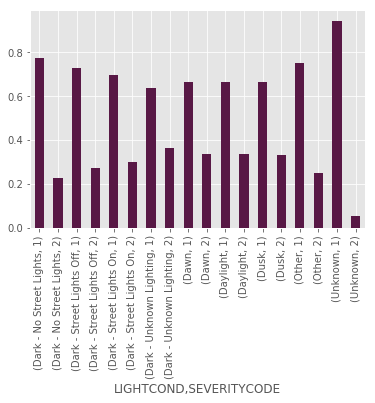

In [54]:
count_data_frame = df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#581845'])

#### Bar plot for SPEEDING (Car Speeding ?)

SPEEDING  SEVERITYCODE
N         1               0.694114
          2               0.305886
Y         1               0.620146
          2               0.379854
Name: SEVERITYCODE, dtype: float64


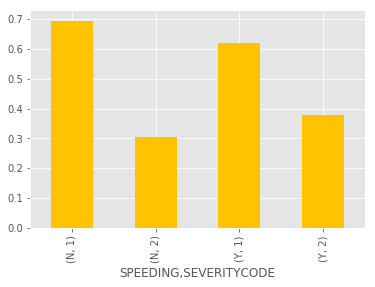

In [55]:
count_data_frame = df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#FFC300'])

#### Bar plot for HITPARKEDCAR (Hited Parked Card?)

HITPARKEDCAR  SEVERITYCODE
N             1               0.682735
              2               0.317265
Y             1               0.928998
              2               0.071002
Name: SEVERITYCODE, dtype: float64


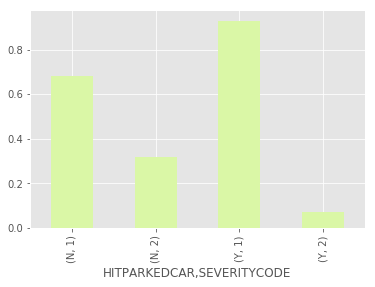

In [56]:
count_data_frame = df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts(normalize=True)
print(count_data_frame)
count_data_frame.plot(kind='bar', color=['#DAF7A6'])

## Rename columns to make fields more readable

### Define dictionary containing mapping for current and new column names

In [57]:
cols = {
        'SEVERITYCODE': 'severity_code',
        'ADDRTYPE':'collision_address_type',
        'HITPARKEDCAR':'hit_parked_car',
        'JUNCTIONTYPE':'junction_type',
        'WEATHER':'weather_condition',
        'SPEEDING':'car_speeding',
        'LIGHTCOND':'light_condition',
        'ROADCOND':'road_condition',
        'PERSONCOUNT': 'no_of_people_involved',
        'VEHCOUNT':'no_of_vehicle_involved',
        'COLLISIONTYPE': 'collision_type',
        'UNDERINFL': 'under_alcohal_or_drug_influence'
       }

### Rename columns in data frame

In [58]:
df.rename(columns=cols, inplace=True)

## Data Categorization

### We have following as object type, we need to convert these to numeric type.
##### ADDRTYPE          object
##### COLLISIONTYPE     object
##### JUNCTIONTYPE      object
##### UNDERINFL         object
##### WEATHER           object
##### ROADCOND          object
##### LIGHTCOND         object
##### SPEEDING          object
##### HITPARKEDCAR      object

### collision_address_type categorization 

In [59]:
df['collision_address_type'] = df['collision_address_type'].astype('category')
df['collision_address_type_cat'] = df['collision_address_type'].cat.codes

### Show collision_address_type categories 

In [60]:
df['collision_address_type'].cat.categories

Index(['Alley', 'Block', 'Intersection'], dtype='object')

### weather_condition categorization

In [61]:
df['weather_condition'] = df['weather_condition'].astype('category')
df['weather_condition_cat'] = df['weather_condition'].cat.codes

### Show weather_condition categories

In [62]:
df['weather_condition'].cat.categories

Index(['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Unknown'], dtype='object')

### car_speeding categorization

In [63]:
df['car_speeding'] = df['car_speeding'].astype('category')
df['car_speeding_cat'] = df['car_speeding'].cat.codes

### Show car_speeding categories

In [64]:
df['car_speeding'].cat.categories

Index(['N', 'Y'], dtype='object')

### light_condition categorization

In [65]:
df['light_condition'] = df['light_condition'].astype('category')
df['light_condition_cat'] = df['light_condition'].cat.codes

### Show light_condition categories

In [66]:
df['light_condition'].cat.categories

Index(['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk', 'Other', 'Unknown'], dtype='object')

### road_condition categorization

In [67]:
df['road_condition'] = df['road_condition'].astype('category')
df['road_condition_cat'] = df['road_condition'].cat.codes

### road_condition categories

In [68]:
df['road_condition'].cat.categories

Index(['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet'], dtype='object')

### junction_type categorization

In [69]:
df['junction_type'] = df['junction_type'].astype('category')
df['junction_type_cat'] = df['junction_type'].cat.codes

### junction_type categories

In [70]:
df['junction_type'].cat.categories

Index(['At Intersection (but not related to intersection)', 'At Intersection (intersection related)', 'Driveway Junction', 'Mid-Block (but intersection related)', 'Mid-Block (not related to intersection)', 'Ramp Junction', 'Unknown'], dtype='object')

### under_alcohal_or_drug_influence categorization

In [71]:
df['under_alcohal_or_drug_influence'] = df['under_alcohal_or_drug_influence'].astype('category')
df['under_alcohal_or_drug_influence_cat'] = df['under_alcohal_or_drug_influence'].cat.codes

### under_alcohal_or_drug_influence categories

In [72]:
df['under_alcohal_or_drug_influence'].cat.categories

Index(['N', 'Y'], dtype='object')

### List data types

In [73]:
df.dtypes

severity_code                             int64
collision_address_type                 category
collision_type                           object
no_of_people_involved                     int64
no_of_vehicle_involved                    int64
junction_type                          category
under_alcohal_or_drug_influence        category
weather_condition                      category
road_condition                         category
light_condition                        category
car_speeding                           category
hit_parked_car                           object
collision_address_type_cat                 int8
weather_condition_cat                      int8
car_speeding_cat                           int8
light_condition_cat                        int8
road_condition_cat                         int8
junction_type_cat                          int8
under_alcohal_or_drug_influence_cat        int8
dtype: object

## Define feature list

In [74]:
feature_list = ['collision_address_type_cat', 'weather_condition_cat', 'car_speeding_cat', 'light_condition_cat',
                'road_condition_cat', 'junction_type_cat', 'no_of_people_involved', 'no_of_vehicle_involved']

### Generate sampled data frame with selected features

In [75]:
sampled_dataframe =  df[feature_list]

### List data types in sampled frame where only features columns present.
### It was required to convert all columns to numeric values, before applying algorithm on it.

In [76]:
sampled_dataframe.dtypes

collision_address_type_cat     int8
weather_condition_cat          int8
car_speeding_cat               int8
light_condition_cat            int8
road_condition_cat             int8
junction_type_cat              int8
no_of_people_involved         int64
no_of_vehicle_involved        int64
dtype: object

### Cross check if there is any missing data even after feature categorization

In [77]:
missing_data = sampled_dataframe.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

collision_address_type_cat
False    182895
Name: collision_address_type_cat, dtype: int64

weather_condition_cat
False    182895
Name: weather_condition_cat, dtype: int64

car_speeding_cat
False    182895
Name: car_speeding_cat, dtype: int64

light_condition_cat
False    182895
Name: light_condition_cat, dtype: int64

road_condition_cat
False    182895
Name: road_condition_cat, dtype: int64

junction_type_cat
False    182895
Name: junction_type_cat, dtype: int64

no_of_people_involved
False    182895
Name: no_of_people_involved, dtype: int64

no_of_vehicle_involved
False    182895
Name: no_of_vehicle_involved, dtype: int64



## Training and Test Data

In [78]:
# Setup training and test data
df_train = sampled_dataframe

In [79]:
# We want to predict accident severity
df_test = df['severity_code']

### Training and test data split

In [80]:
# Split training and test data (80% Training and 20% Test data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.2)

# Model Selection and evaluation

## Here going to predict accident serverity with various models. Based on results, will recommend to use the best one.

### Using Following
<ol>
    <li>Logistic Regression</li>
    <li>k-nearest neighbors</li>
    <li>Random Forest Classifier</li>
    <li>Random Forest Classifier with class_weight as balanced_subsample</li>
    <li>Gradient Boosted decision trees</li>
    <li>Gaussian Naive Bayes Classifier</li>
    <li>Gradient Boosting Classifier</li>
</ol>

### Imports common to all classification models

In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Print results

In [83]:
logistic_regression_accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", logistic_regression_accuracy_score)

print(confusion_matrix(y_test, y_pred))  

print(classification_report(y_test, y_pred))

Accuracy: 0.7104622871046229
[[24055  1246]
 [ 9345  1933]]
              precision    recall  f1-score   support

           1       0.72      0.95      0.82     25301
           2       0.61      0.17      0.27     11278

   micro avg       0.71      0.71      0.71     36579
   macro avg       0.66      0.56      0.54     36579
weighted avg       0.69      0.71      0.65     36579



## k-nearest neighbors

In [84]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (with the default parameters)
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# fit the model with data (occurs in-place)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

### Print results

In [85]:
knn_accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy_score)

print(confusion_matrix(y_test, y_pred))  

print(classification_report(y_test, y_pred))

Accuracy: 0.7056507832362832
[[22079  3222]
 [ 7545  3733]]
              precision    recall  f1-score   support

           1       0.75      0.87      0.80     25301
           2       0.54      0.33      0.41     11278

   micro avg       0.71      0.71      0.71     36579
   macro avg       0.64      0.60      0.61     36579
weighted avg       0.68      0.71      0.68     36579



## Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

# The number of trees in the forest 300
rdf = RandomForestClassifier(n_estimators=300,random_state=35)

rdf.fit(X_train,y_train)

y_pred=rdf.predict(X_test)

### Print results

In [87]:
random_forest_accuracy_score_1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", random_forest_accuracy_score_1)

print(confusion_matrix(y_test, y_pred))  

print(classification_report(y_test, y_pred))

Accuracy: 0.7386205199704748
[[23928  1373]
 [ 8188  3090]]
              precision    recall  f1-score   support

           1       0.75      0.95      0.83     25301
           2       0.69      0.27      0.39     11278

   micro avg       0.74      0.74      0.74     36579
   macro avg       0.72      0.61      0.61     36579
weighted avg       0.73      0.74      0.70     36579



## Gaussian Naive Bayes Classifier

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

### Print results

In [89]:
gaussian_naive_bayes_accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", gaussian_naive_bayes_accuracy_score)

print(confusion_matrix(y_test, y_pred))

print(format(classification_report(y_test, y_pred)))

Accuracy: 0.6983515131632904
[[21350  3951]
 [ 7083  4195]]
              precision    recall  f1-score   support

           1       0.75      0.84      0.79     25301
           2       0.51      0.37      0.43     11278

   micro avg       0.70      0.70      0.70     36579
   macro avg       0.63      0.61      0.61     36579
weighted avg       0.68      0.70      0.68     36579



## Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss="deviance", learning_rate=0.1, 
      n_estimators=100, subsample=1.0, criterion="friedman_mse", 
      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
      max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
      random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
      presort="auto")

y_pred = gbc.fit(X_train, y_train.values.ravel()).predict(X_test)

### Print results

In [91]:
gradient_boosting_classifier_accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", gradient_boosting_classifier_accuracy_score)

print(confusion_matrix(y_test, y_pred))  

print(format(classification_report(y_test, y_pred)))

Accuracy: 0.7407802290931955
[[24307   994]
 [ 8488  2790]]
              precision    recall  f1-score   support

           1       0.74      0.96      0.84     25301
           2       0.74      0.25      0.37     11278

   micro avg       0.74      0.74      0.74     36579
   macro avg       0.74      0.60      0.60     36579
weighted avg       0.74      0.74      0.69     36579



In [93]:
table = pd.DataFrame()
table["Algorithm"] = ['Logistic Regression', 'k-nearest neighbors', 'Random Forest Classifier', 
                      'Gaussian Naive Bayes Classifier', 'Gradient Boosting Classifier']
table["Accuracy"] = [logistic_regression_accuracy_score, knn_accuracy_score, random_forest_accuracy_score_1,
                     gaussian_naive_bayes_accuracy_score, gradient_boosting_classifier_accuracy_score]
table

,Algorithm,Accuracy
0,Logistic Regression,0.710462
1,k-nearest neighbors,0.705651
2,Random Forest Classifier,0.738621
3,Gaussian Naive Bayes Classifier,0.698352
4,Gradient Boosting Classifier,0.740780
